# Problem statement:

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Data description:

Trip_distance: The elapsed trip distance in miles reported by the taximeter.

Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or 
Westchester, 5=Negotiated fare,6=Group ride

Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip

Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip

Fare_amount: The time-and-distance fare calculated by the meter

Extra: Miscellaneous extras and surcharges.

Mta_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Tip_amount: Tip amount credited to the driver for credit card transactions.

Tolls_amount: Total amount of all tolls paid in the trip.

Imp_surcharge: $0.30 extra charges added automatically to all rides

Total_amount: The total amount charged to passengers. Does not include cash tips

Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged

Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged

Year: The year in which the taxi trip was taken.

Month: The month on which the taxi trip was taken.

Day: The day on which the taxi trip was taken.

Day_of_week: The day of the week on which the taxi trip was taken

Hour_of_day: Used to determine the hour of the day in 24 hours format

Trip_duration: The total duration of the trip in seconds

calculated_total_amount: The total amount the customer has to pay for the taxi.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[20,8]
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
train=pd.read_csv("train.csv")
train.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [3]:
test=pd.read_csv("test.csv")
test.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [4]:
# univariate analysis

com=pd.concat([train,test],ignore_index=True)
com.shape

(50000, 20)

In [5]:
com.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [6]:
# all are categorical but in int type
print(com.rate_code.unique())
print(com.mta_tax.unique())
print(com.imp_surcharge.unique())
print(com.payment_type.unique())


[1 3 5 4 2]
[0.5 0. ]
[0.3 0. ]
[1 2 3 4]


In [7]:
# converting above into obj type
com["rate_code"]=com.rate_code.astype("object")
com["mta_tax"]=com.mta_tax.astype("object")
com["imp_surcharge"]=com.imp_surcharge.astype("object")
com["payment_type"]=com.payment_type.astype("object")

In [8]:
com.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

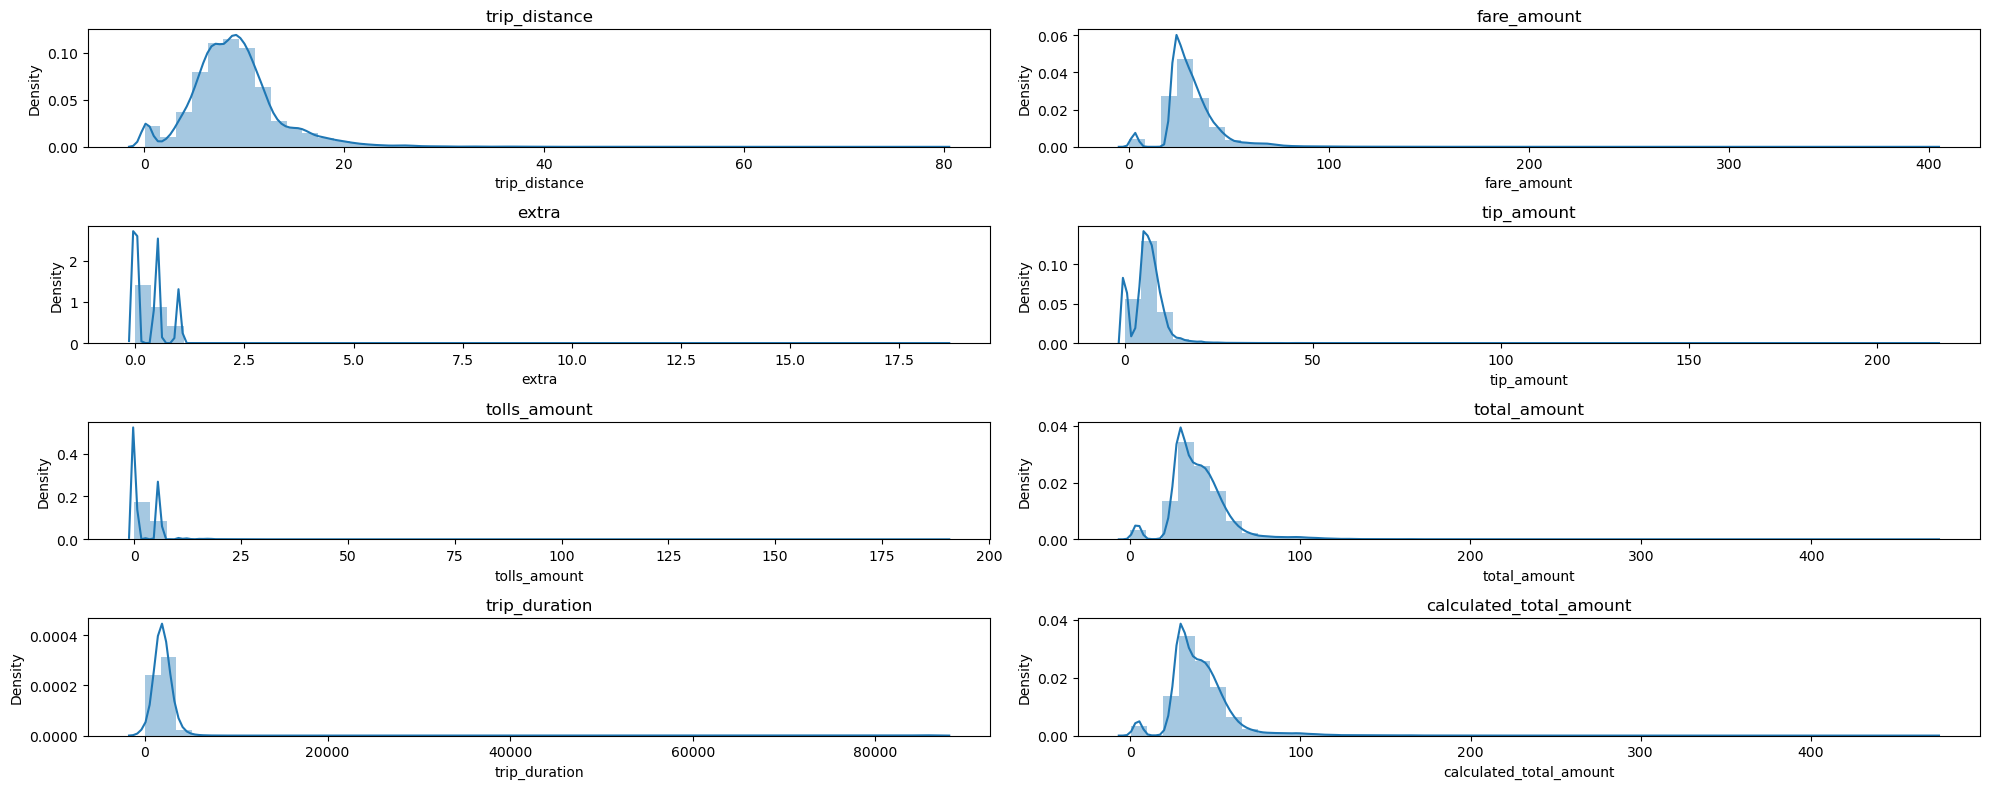

In [12]:
num=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration',
       'calculated_total_amount']
it=1
for i in num:
    plt.subplot(4,2,it)
    sns.distplot(com[i])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()

# all the numerical variables are postively skewed

In [14]:
com.select_dtypes(include="object").columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

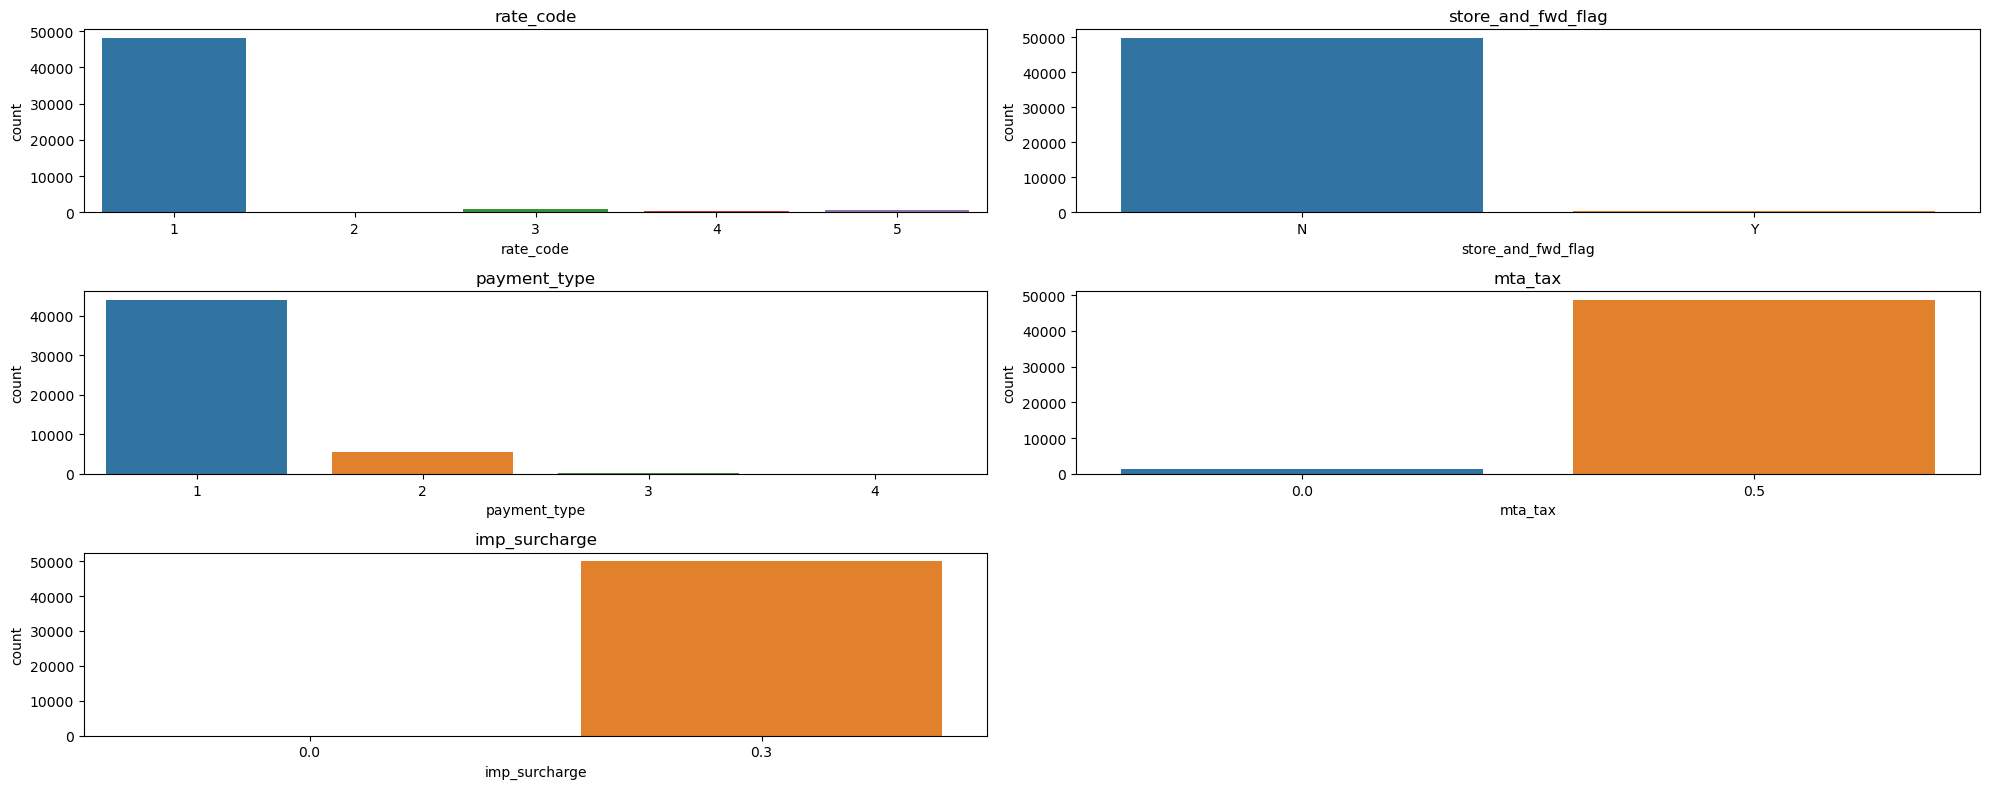

In [16]:
cat=['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']

it=1
for i in cat:
    plt.subplot(3,2,it)
    sns.countplot(com[i])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()
     

# bivariate analysis


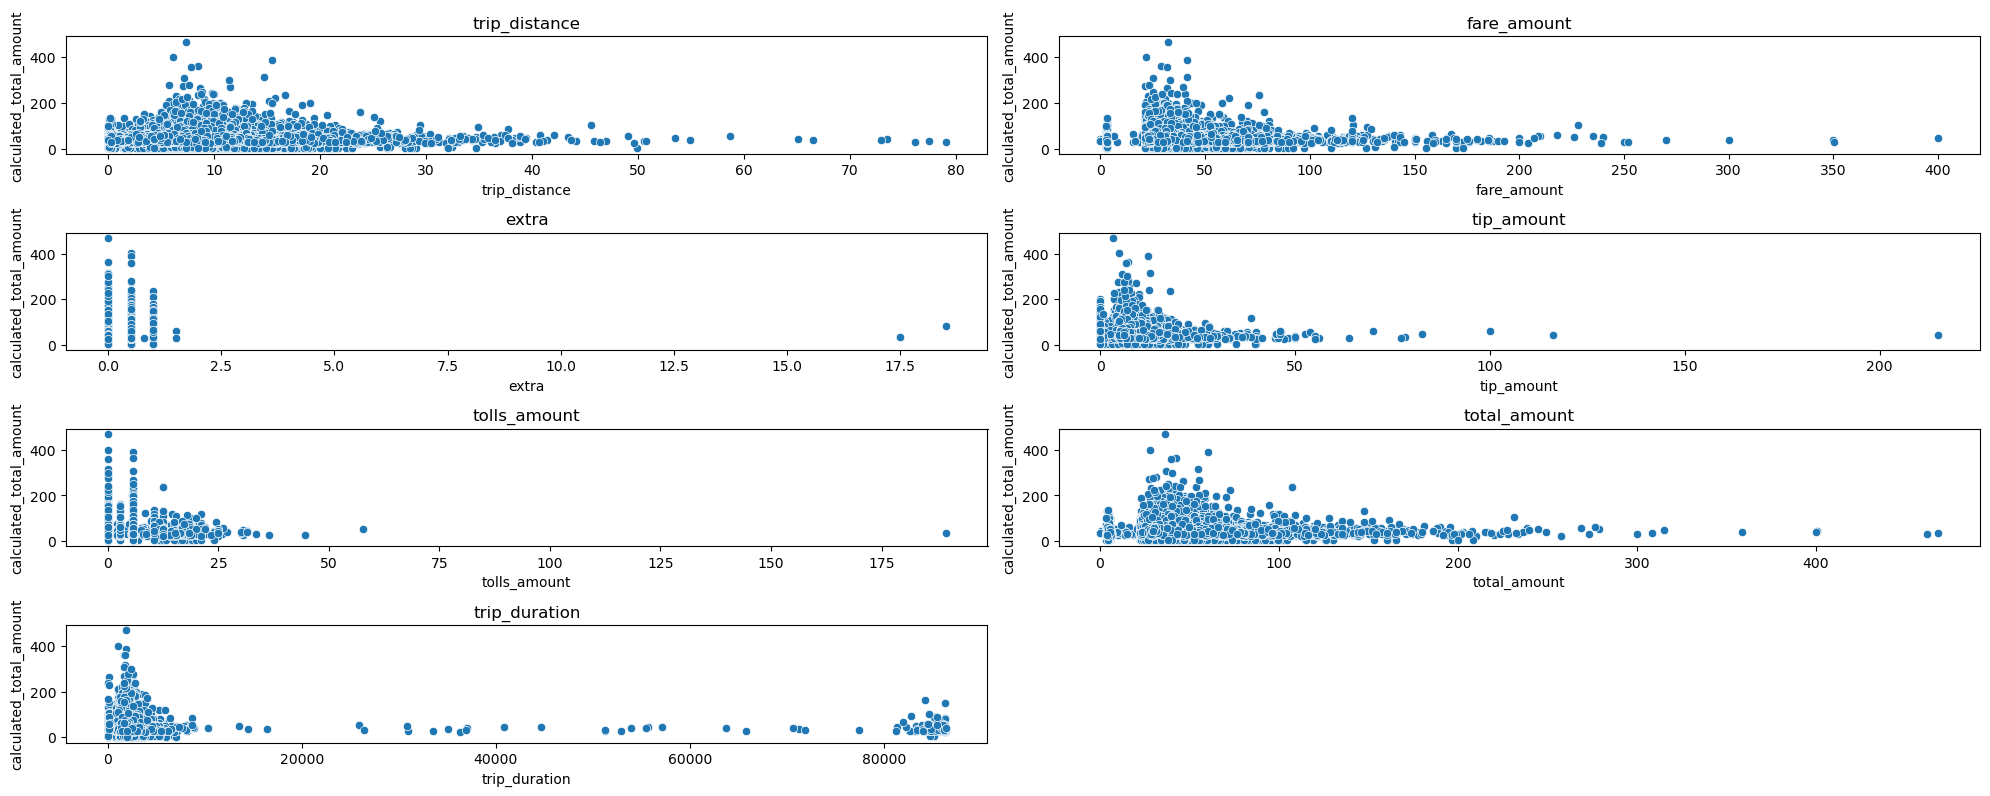

In [17]:
# num vs tar
num=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration'
       ]
it=1
for i in num:
    plt.subplot(4,2,it)
    sns.scatterplot(com[i],com['calculated_total_amount'])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()


# outliers present
# no correlation between the independent and target variable

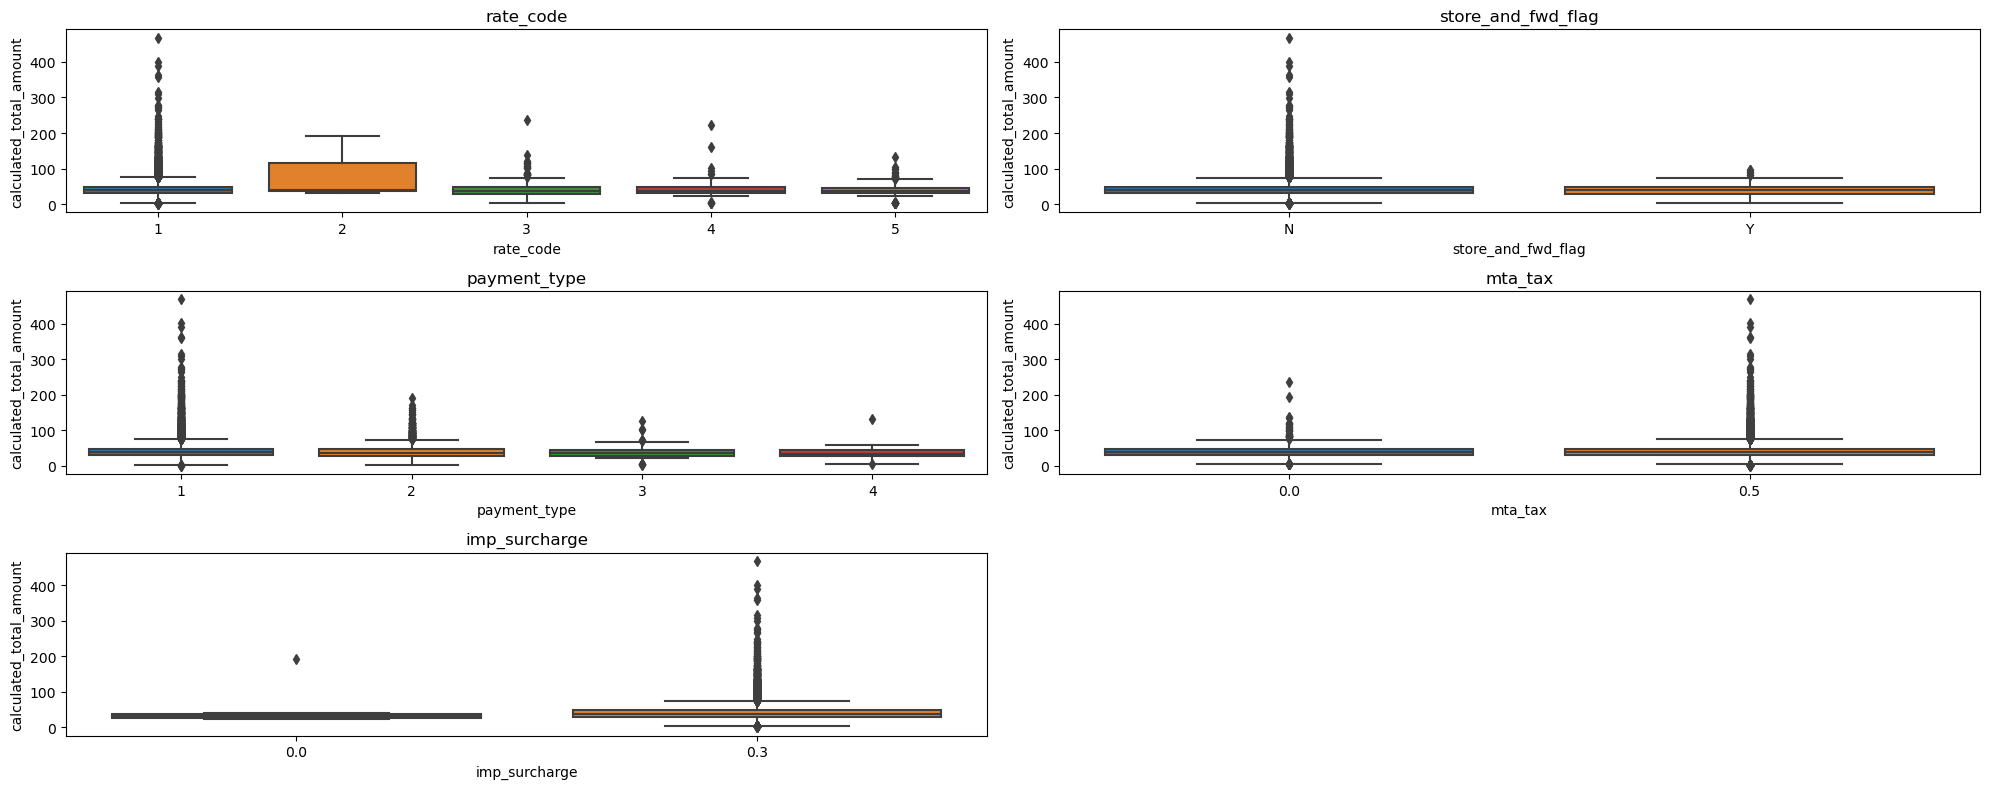

In [19]:
cat=['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']

it=1
for i in cat:
    plt.subplot(3,2,it)
    sns.boxplot(com[i],com["calculated_total_amount"])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()
     

# Missing Values

In [20]:
com.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

<AxesSubplot:>

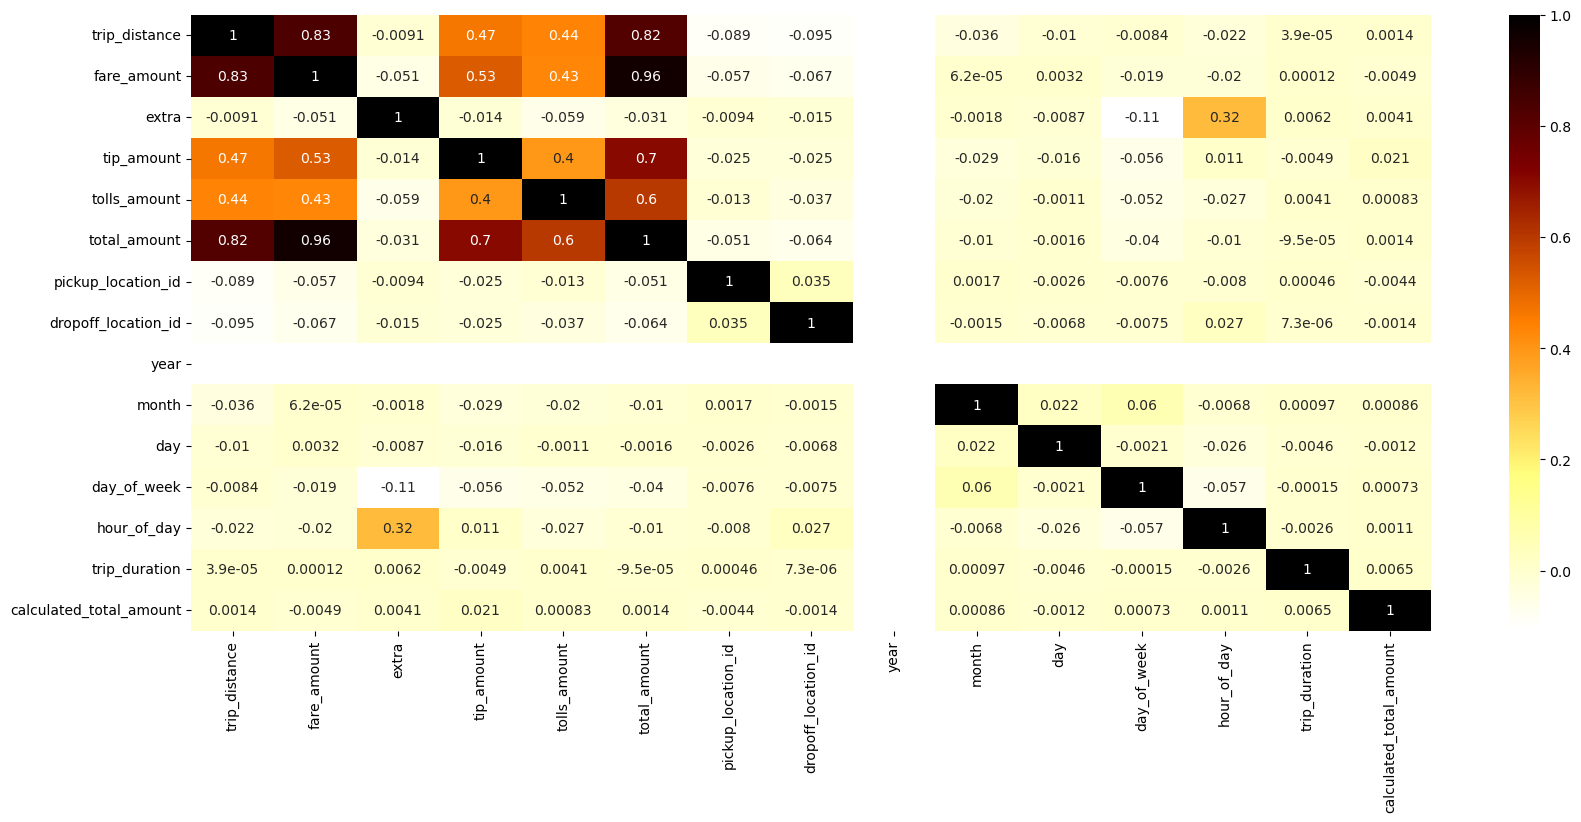

In [22]:
# bivariate analysis

sns.heatmap(com.corr(),annot=True,cmap="afmhot_r")

## Feature Engg

In [23]:
com.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

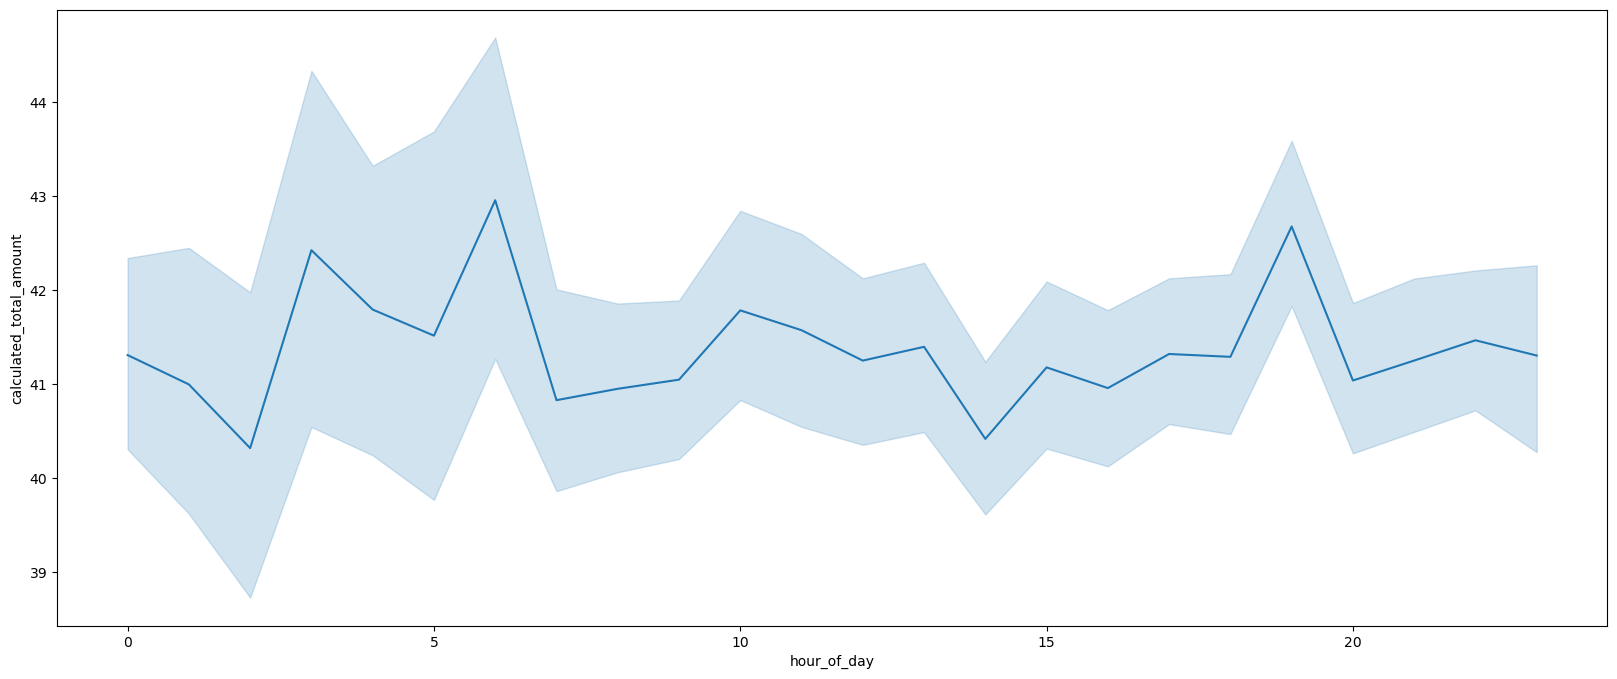

In [24]:
sns.lineplot(com["hour_of_day"],com["calculated_total_amount"])
plt.show()

In [25]:
#creating new variable called rush hour

com["rush_hour"]=com.hour_of_day.apply(lambda x:1 if x in [6,10,15,16,17,18,19,20] else 0)

In [26]:
com.head(1)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.7,262,138,2018,3,7,2,6,2131.0,24.3,1


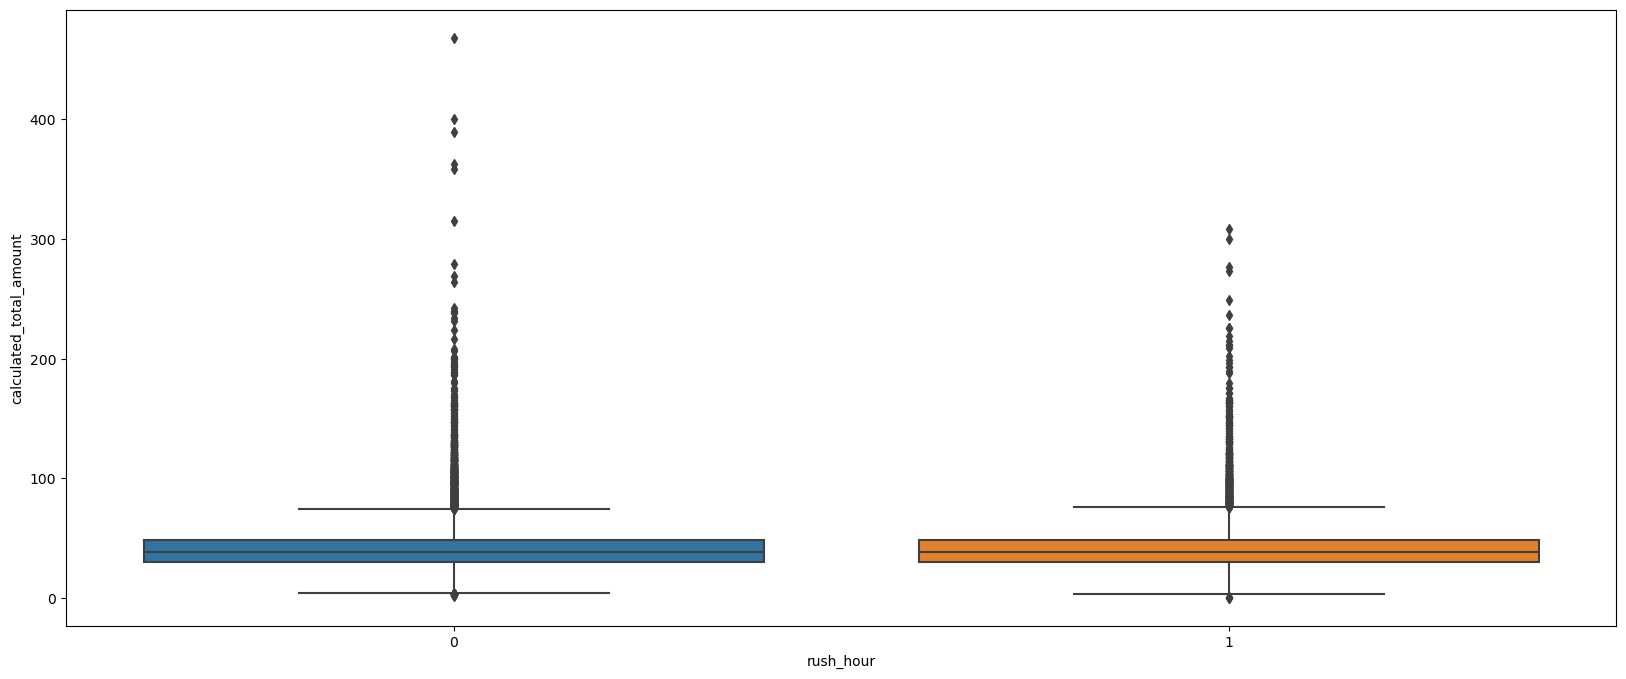

In [27]:
# rush hour va target

sns.boxplot(x="rush_hour",y="calculated_total_amount",data=com)
plt.show()

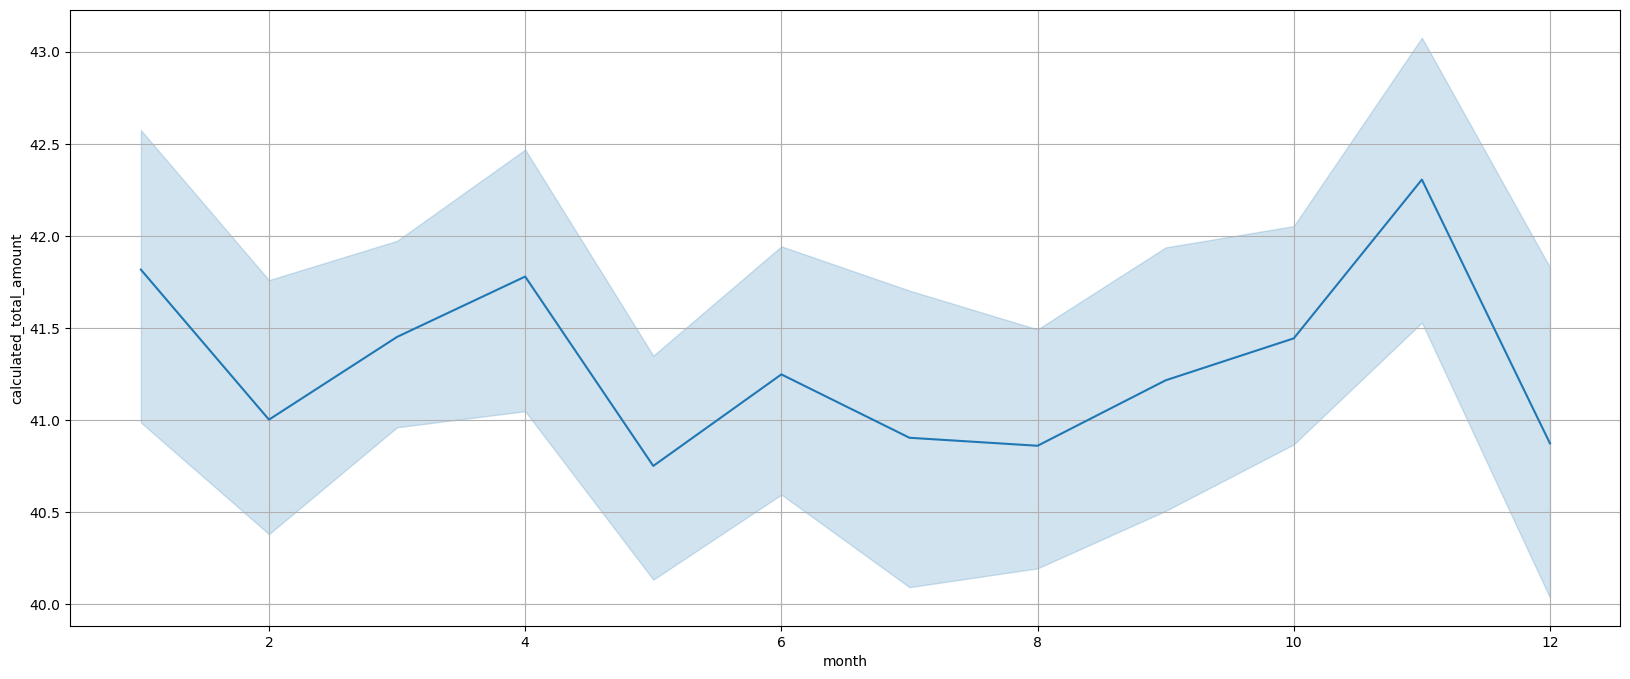

In [29]:
sns.lineplot(com["month"],com["calculated_total_amount"])
plt.grid()
plt.show()

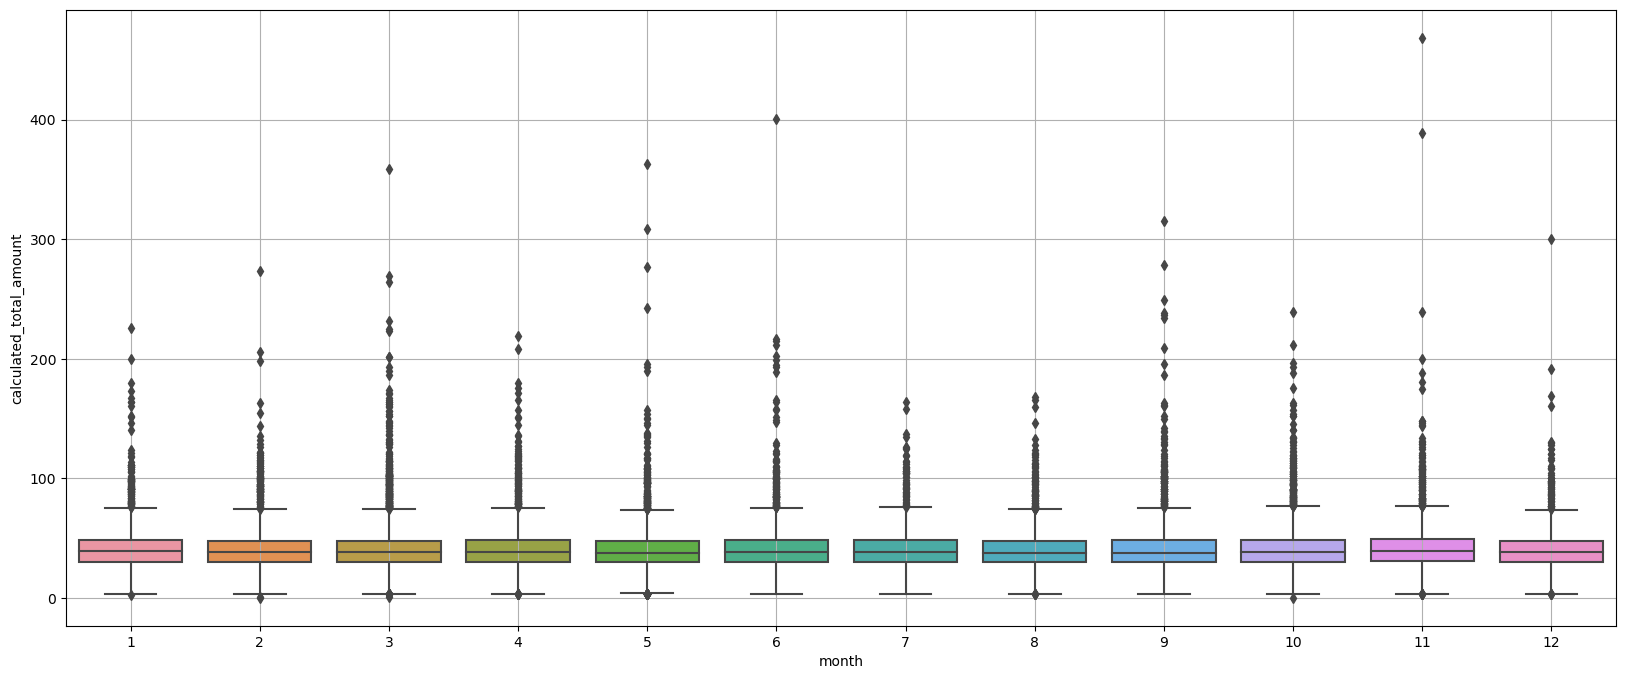

In [31]:
sns.boxplot(com["month"],com["calculated_total_amount"])
plt.grid()
plt.show()

In [34]:
# clustering the months using yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmean=KMeans()
visualizer=KElbowVisualizer(estimator=kmean,random_state=0)

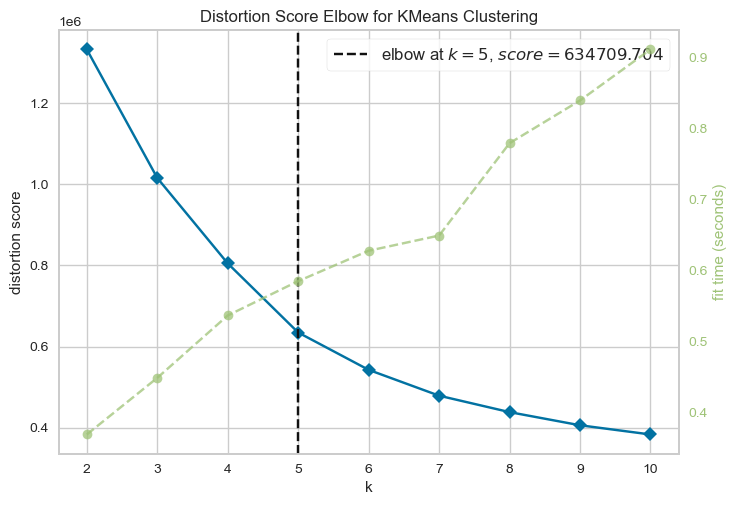

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
data=com.loc[:,["day_of_week",'hour_of_day','month']]
visualizer.fit(data)
visualizer.show()

In [38]:
# n_clusters=5
kmeans=KMeans(n_clusters=5,random_state=0)
k=kmeans.fit(data)
k.labels_

com["clusters"]=k.labels_

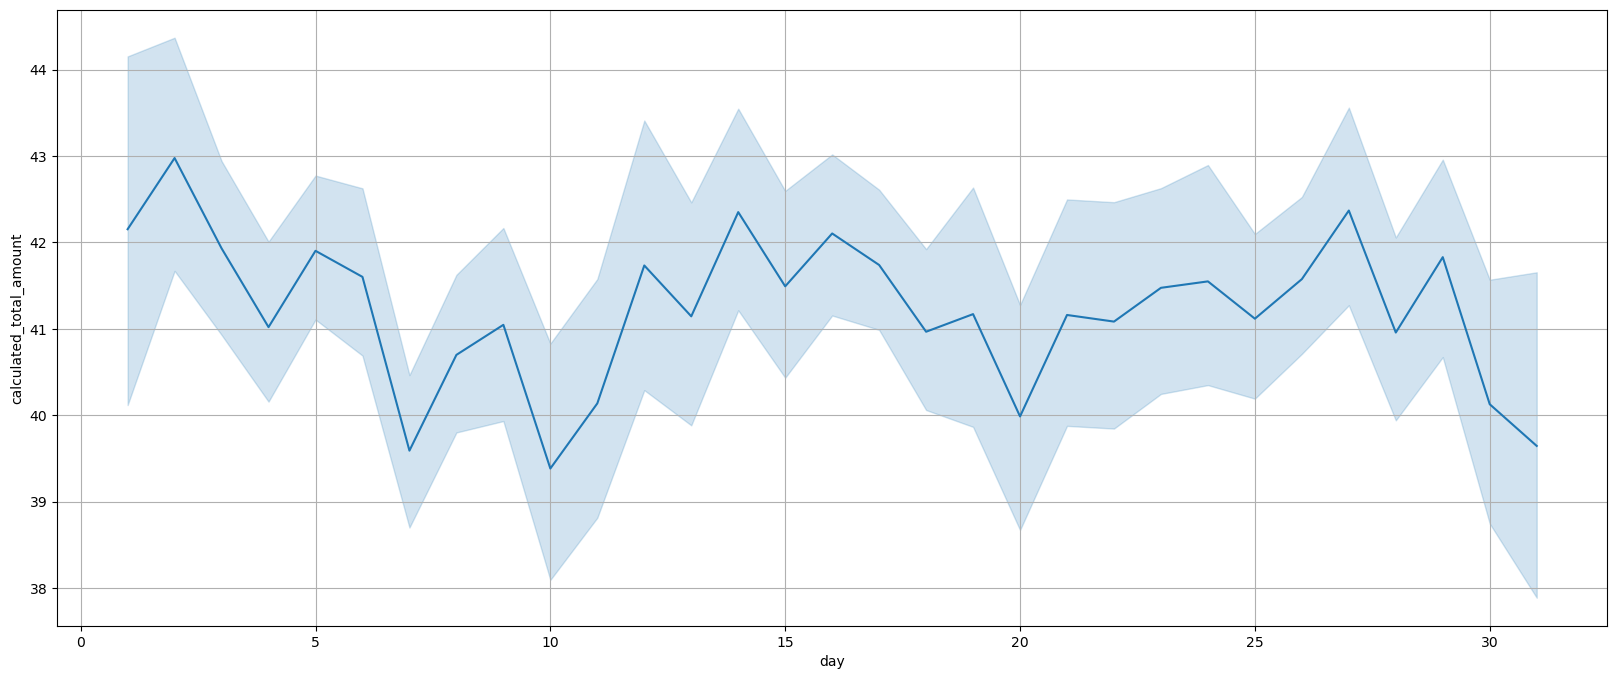

In [30]:
sns.lineplot(com["day"],com["calculated_total_amount"])
plt.grid()
plt.show()

In [39]:
# converting tripduration from secs to min
com["trip_duration"]=com["trip_duration"]/60
com.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,35.516667,24.3,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,39.616667,37.4,1,4


In [40]:
# split the data into train and test

train.shape,test.shape

((35000, 20), (15000, 19))

In [42]:
newtrain=com.loc[0:train.shape[0]-1,:]
newtest=com.loc[train.shape[0]:,:]

In [43]:
newtrain.shape,newtest.shape

((35000, 22), (15000, 22))

In [44]:
newtest.drop("calculated_total_amount",axis=1,inplace=True)

# Outlier Treatement

In [46]:
q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
iqr=q3-q1

upper_lim=q3+1.5*iqr
lower_lim=q1-1.5*iqr

wt_out=newtrain.loc[~((newtrain<lower_lim)|(newtrain>upper_lim)).any(axis=1)]


In [47]:
wt_out.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,35.516667,24.30,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,21.433333,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,43.100000,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,26.250000,23.80,0,3
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,0.3,48.08,138,100,2018,1,8,0,7,33.816667,30.95,0,4


In [48]:
wt_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26105 entries, 0 to 34997
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            26105 non-null  float64
 1   rate_code                26105 non-null  object 
 2   store_and_fwd_flag       26105 non-null  object 
 3   payment_type             26105 non-null  object 
 4   fare_amount              26105 non-null  float64
 5   extra                    26105 non-null  float64
 6   mta_tax                  26105 non-null  object 
 7   tip_amount               26105 non-null  float64
 8   tolls_amount             26105 non-null  float64
 9   imp_surcharge            26105 non-null  object 
 10  total_amount             26105 non-null  float64
 11  pickup_location_id       26105 non-null  int64  
 12  dropoff_location_id      26105 non-null  int64  
 13  year                     26105 non-null  int64  
 14  month                 

In [49]:
# dropping insignificat variable 
finaltrain=wt_out.drop(["calculated_total_amount",'year','pickup_location_id','dropoff_location_id'],axis=1)
finaltest=newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)

In [50]:
finaltrain.shape,finaltest.shape

((26105, 18), (15000, 18))

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
finaltrain.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters'],
      dtype='object')

In [58]:
finaltest.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'rush_hour', 'clusters'],
      dtype='object')

In [55]:
num_cols=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']
mm=MinMaxScaler()

for i in num_cols:
    finaltrain.loc[:,i]=mm.fit_transform(finaltrain[[i]])
    finaltest.loc[:,i]=mm.transform(finaltest[[i]])

In [56]:
finaltrain.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
0,0.506764,1,N,1,0.408034,0.0,0.5,0.602071,0.403927,0.3,0.482450,0.181818,0.200000,0.333333,0.260870,0.566583,1,4
2,0.542841,1,N,1,0.735729,0.0,0.5,0.710799,0.403927,0.3,0.735922,0.000000,0.933333,0.000000,0.347826,0.329689,0,4


In [57]:
finaltest.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
35000,15.70,1,N,2,0.809725,0.0,0.5,0.000000,0.000000,0.3,0.558626,0.818182,0.633333,0.833333,0.695652,1.081301,1,3
35001,7.30,1,N,1,0.397463,0.0,0.5,0.583580,0.000000,0.3,0.385213,0.090909,0.766667,0.833333,0.652174,0.387160,1,0
35002,14.87,1,N,1,0.714588,0.5,0.5,0.618343,0.000000,0.3,0.623749,0.727273,0.333333,0.166667,0.956522,0.360247,0,3
35003,2.90,1,N,2,0.323467,0.0,0.5,0.000000,0.000000,0.3,0.215086,0.454545,0.200000,0.500000,0.478261,0.457527,0,4
35004,8.96,1,N,1,0.534884,0.0,0.5,0.000000,0.403927,0.3,0.450485,0.272727,0.633333,0.666667,0.434783,0.424166,1,4


In [59]:
finaltest["trip_distance"]=mm.transform(finaltest[["trip_distance"]])

In [60]:
finaltest.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
35000,0.233249,1,N,2,0.809725,0.0,0.5,0.000000,0.000000,0.3,0.558626,0.818182,0.633333,0.833333,0.695652,1.081301,1,3
35001,0.091954,1,N,1,0.397463,0.0,0.5,0.583580,0.000000,0.3,0.385213,0.090909,0.766667,0.833333,0.652174,0.387160,1,0
35002,0.219288,1,N,1,0.714588,0.5,0.5,0.618343,0.000000,0.3,0.623749,0.727273,0.333333,0.166667,0.956522,0.360247,0,3
35003,0.017942,1,N,2,0.323467,0.0,0.5,0.000000,0.000000,0.3,0.215086,0.454545,0.200000,0.500000,0.478261,0.457527,0,4
35004,0.119877,1,N,1,0.534884,0.0,0.5,0.000000,0.403927,0.3,0.450485,0.272727,0.633333,0.666667,0.434783,0.424166,1,4


In [61]:
# dummy
dummytrain=pd.get_dummies(finaltrain,drop_first=True)
dummytest=pd.get_dummies(finaltest,drop_first=True)

In [62]:
dummytrain.shape,dummytest.shape

((26105, 22), (15000, 23))

In [63]:
dummytest.columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters', 'rate_code_2', 'rate_code_3',
       'rate_code_4', 'rate_code_5', 'store_and_fwd_flag_Y', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'mta_tax_0.5', 'imp_surcharge_0.3'],
      dtype='object')

In [64]:
dummytrain.columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters', 'rate_code_3', 'rate_code_4',
       'rate_code_5', 'store_and_fwd_flag_Y', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'mta_tax_0.5', 'imp_surcharge_0.3'],
      dtype='object')

In [65]:
# rate_code_2
dummytest.drop("rate_code_2",axis=1,inplace=True)
dummytest.shape


(15000, 22)

In [66]:
# Model Building

In [67]:
y=wt_out.calculated_total_amount

In [68]:
# training and validation set to build the modles
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [74]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
lr=LinearRegression()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=lr.fit(xtrain,ytrain).predict(xtrain)
    predtest=lr.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.36551935198674
12.376492810045995


In [76]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=dt.fit(xtrain,ytrain).predict(xtrain)
    predtest=dt.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

2.1756399180688333e-17
18.057478309781253


In [77]:
from sklearn.linear_model import Ridge,Lasso

# Ridge
r=Ridge(alpha=1)

rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=r.fit(xtrain,ytrain).predict(xtrain)
    predtest=r.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365651409180904
12.375639479509038


In [79]:
# Lasso
l=Lasso(alpha=0.5)
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=l.fit(xtrain,ytrain).predict(xtrain)
    predtest=l.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


In [80]:
# randomforest model
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
rf=RandomForestRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=rf.fit(xtrain,ytrain).predict(xtrain)
    predtest=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

4.730618060661815
12.631548609646554


In [81]:
#Adaboost
ada=AdaBoostRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=ada.fit(xtrain,ytrain).predict(xtrain)
    predtest=ada.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.35974622241517
12.3773649838905


In [82]:
# GradientBoosting

gb=GradientBoostingRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=gb.fit(xtrain,ytrain).predict(xtrain)
    predtest=gb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.200447831959028
12.38565778338798


In [83]:
from lightgbm import LGBMRegressor

In [84]:
# lgbm
lgbm=LGBMRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=lgbm.fit(xtrain,ytrain).predict(xtrain)
    predtest=lgbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.549946969135831
12.447423652558982


In [85]:
from xgboost import XGBRegressor

In [86]:
#xgb
xgb=XGBRegressor()
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=xgb.fit(xtrain,ytrain).predict(xtrain)
    predtest=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

10.028084396358583
12.808312825916971


In [87]:
#xgb with hypertuning
xgb=XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=xgb.fit(xtrain,ytrain).predict(xtrain)
    predtest=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.27149670428059
12.383288679798659


In [89]:
# randomforest with hypertuning
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
rmse_train=[]
rmse_test=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation test
    predtrain=rf.fit(xtrain,ytrain).predict(xtrain)
    predtest=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,predtrain)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,predtest)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834335752808966
12.504883281288372


# Final Prediction

In [90]:
# randomforest with hypertuning
rf=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
pred=[]

for  train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index] 
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
    

In [91]:
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [93]:
sub=pd.DataFrame({"calculated_total_amount":finalpred})
sub.to_csv("taxirfmodel.csv",index=False)

In [94]:
cd

C:\Users\bprat


In [95]:
from sklearn.ensemble import StackingRegressor

In [98]:
base=[("lr",lr),("gbm",gb),("xgb",xgb),("lgbm",lgbm)]
final=RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)

stack=StackingRegressor(estimators=base,final_estimator=final,cv=5)

pred=stack.fit(dummytrain,y).predict(dummytest)
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({"calculated_total_amount":pred})
sub.to_csv("taxistackmodel.csv",index=False)

<AxesSubplot:>

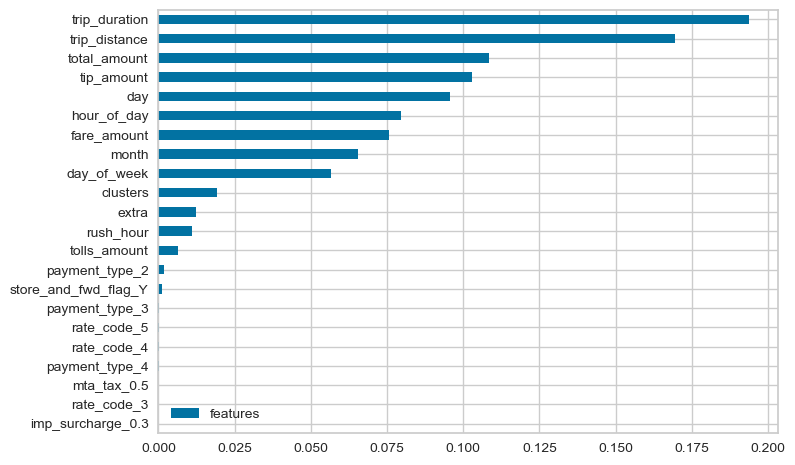

In [99]:
pd.DataFrame(rf.feature_importances_,index=dummytest.columns,columns=["features"]).sort_values(by="features").plot(kind="barh")